In [134]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np

In [135]:
g_mat = np.random.binomial(1, 0.2, (10, 10))

In [136]:
len(g_mat.nonzero()[0])

21

In [137]:
G = nx.Graph(g_mat)

In [138]:
weights = np.random.random_integers(low=1, high=10, size=len(G.edges()))

In [139]:
weights

array([4, 2, 4, 4, 4, 8, 4, 5, 3, 3, 9, 7, 7, 5, 2, 5, 1, 5, 5])

In [140]:
for i, (n1, n2) in enumerate(G.edges()):
    G[n1][n2]['weight'] = weights[i]

{(0, 1): <matplotlib.text.Text at 0x7f41017901d0>,
 (0, 5): <matplotlib.text.Text at 0x7f4101694550>,
 (0, 6): <matplotlib.text.Text at 0x7f4101694a50>,
 (0, 8): <matplotlib.text.Text at 0x7f410161add0>,
 (1, 8): <matplotlib.text.Text at 0x7f4101694310>,
 (1, 9): <matplotlib.text.Text at 0x7f41017bb790>,
 (2, 4): <matplotlib.text.Text at 0x7f4101655310>,
 (2, 5): <matplotlib.text.Text at 0x7f410161a710>,
 (2, 6): <matplotlib.text.Text at 0x7f41017c1f90>,
 (2, 8): <matplotlib.text.Text at 0x7f4101865550>,
 (3, 4): <matplotlib.text.Text at 0x7f41016553d0>,
 (3, 8): <matplotlib.text.Text at 0x7f410168a950>,
 (4, 7): <matplotlib.text.Text at 0x7f41018b51d0>,
 (4, 9): <matplotlib.text.Text at 0x7f41017ec090>,
 (5, 5): <matplotlib.text.Text at 0x7f41017ec750>,
 (5, 6): <matplotlib.text.Text at 0x7f4101661e90>,
 (5, 7): <matplotlib.text.Text at 0x7f410168a390>,
 (6, 7): <matplotlib.text.Text at 0x7f41017bba10>,
 (7, 9): <matplotlib.text.Text at 0x7f4101608b50>}

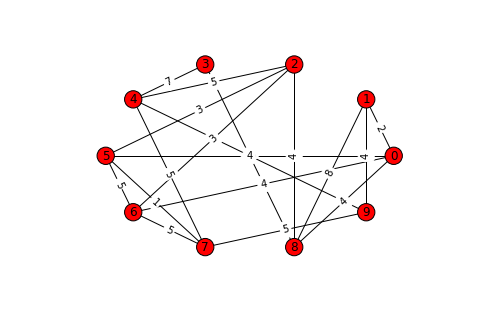

In [141]:
pos = nx.circular_layout(G)

node_labels = {}
for u in G.nodes():
    node_labels[u] = u
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels = node_labels)
edge_labels = {(n1,n2): G[n1][n2]['weight'] for (n1,n2) in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

In [142]:
pos=graphviz_layout(G,prog='neato')

In [143]:
def draw_shortest_path(G, pos, start, end):
    path = nx.shortest_path(G, start, end, weight='weight')
    colors = node_colors(G, path)
    # draw graph with weights on edges
    edge_labels = {(n1,n2): G[n1][n2]['weight'] for (n1,n2) in G.edges()}
    nx.draw_networkx(G, pos, node_color=colors)
    nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)

In [144]:
def node_colors(G, path):
    colors = []
    for node in G.nodes():
        if node in path:
            colors.append('b')
        else:
            colors.append('r')
    return colors

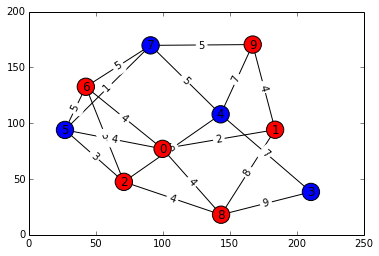

In [145]:
draw_shortest_path(G, pos, 3, 5)

In [146]:
nx.get_edge_attributes(G, 'weight')

{(0, 1): 2,
 (0, 5): 4,
 (0, 6): 4,
 (0, 8): 4,
 (1, 8): 8,
 (1, 9): 4,
 (2, 4): 5,
 (2, 5): 3,
 (2, 6): 3,
 (2, 8): 4,
 (3, 4): 7,
 (3, 8): 9,
 (4, 7): 5,
 (4, 9): 7,
 (5, 5): 2,
 (5, 6): 5,
 (5, 7): 1,
 (6, 7): 5,
 (7, 9): 5}

In [147]:
nx.minimum_spanning_tree(G)

In [151]:
nx.minimum_spanning_edges(G)

<generator object minimum_spanning_edges at 0x7f41018c5b90>

In [152]:
nx.bfs_edges(G, 0)

<generator object bfs_edges at 0x7f41018c8820>

In [153]:
list(nx.bfs_edges(G, 0))

[(0, 8), (0, 1), (0, 5), (0, 6), (8, 2), (8, 3), (1, 9), (5, 7), (2, 4)]

In [154]:
nx.dfs_edges(G, 0)

<generator object dfs_edges at 0x7f4101a545f0>

In [155]:
list(nx.dfs_edges(G, 0))

[(0, 8), (8, 1), (1, 9), (9, 4), (4, 2), (2, 5), (5, 6), (6, 7), (4, 3)]

In [156]:
nx.dfs_tree(G, 0)

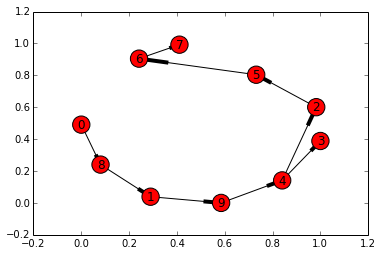

In [157]:
nx.draw_networkx(_)